In [49]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score, recall_score, f1_score

In [50]:
data = pd.read_csv("Social_Network_Ads.csv")

In [51]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
71,15726358,Female,24,27000,0
243,15769596,Female,56,104000,1
66,15679760,Male,24,19000,0
90,15684801,Male,22,81000,0
10,15570769,Female,26,80000,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [53]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [54]:
def cat_to_num(value):
    if(value=="Male"):
        return 1
    elif(value=="Female"):
        return 0
    else:
        pass

In [55]:
data["Gender"]=data["Gender"].apply(cat_to_num)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


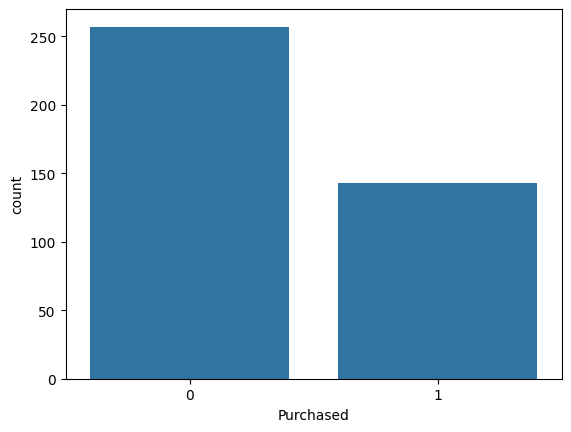

In [56]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

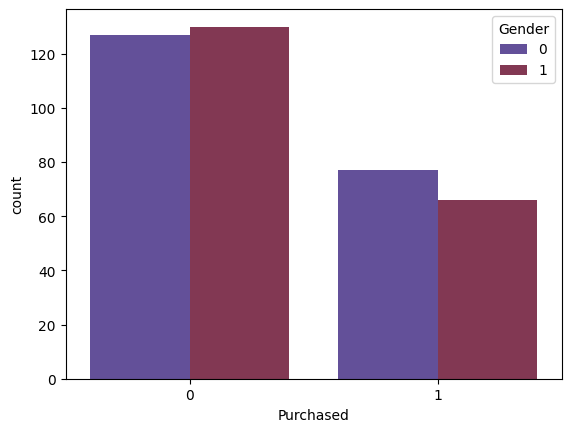

In [57]:
sns.countplot(data = data, x = 'Purchased', hue='Gender',palette="twilight");

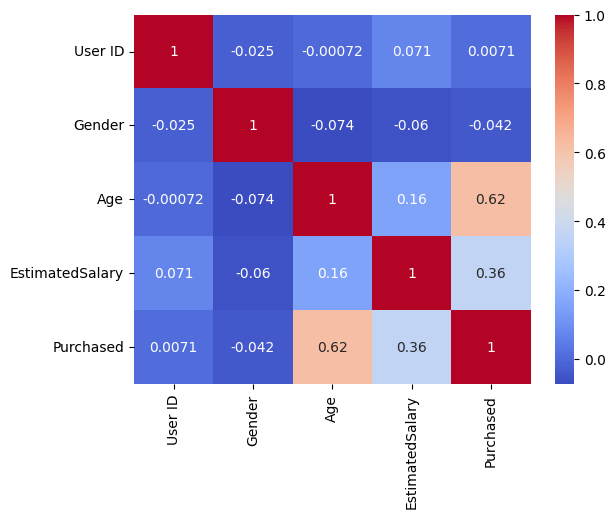

In [58]:
# Finding useful features 
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm' );

In [59]:
features = data[['Age', 'EstimatedSalary']]
label = data['Purchased']

In [60]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [61]:
x = features
y = label

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(x_test)

In [65]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

<Axes: >

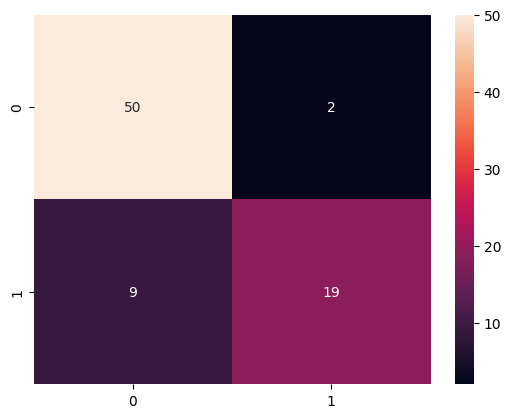

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [69]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + FP + TN + FN)
error_rate = (FP + FN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8625
Error Rate: 0.1375
Precision: 0.9047619047619048
Recall: 0.6785714285714286


In [48]:
acc=accuracy_score(y_test, y_pred)
acc

0.8625

In [70]:
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")
print(f"Precision score is {precision_score(y_test, y_pred)}")
print(f"Recall score is {recall_score(y_test, y_pred)}")

Error rate is 0.13749999999999996
Precision score is 0.9047619047619048
Recall score is 0.6785714285714286


In [71]:
# True Positive (TP): The number of observations that are actually positive and are predicted by the model to be positive.
# False Positive (FP): The number of observations that are actually negative but are predicted by the model to be positive.
# True Negative (TN): The number of observations that are actually negative and are predicted by the model to be negative.
# False Negative (FN): The number of observations that are actually positive but are predicted by the model to be negative.

In [ ]:
# Accuracy:
# Accuracy is the ratio of correctly predicted observations to the total observations. It measures the overall correctness of the model.
# Formula: (TP + TN) / (TP + FP + TN + FN)
# High accuracy indicates that the model is making correct predictions overall.
# Precision:
# Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It measures the accuracy of positive predictions.
# Formula: TP / (TP + FP)
# High precision indicates that the model is not mislabeling negative observations as positive.
# Recall (also known as Sensitivity or True Positive Rate):
# Recall is the ratio of correctly predicted positive observations to the actual positive observations. It measures the model's ability to correctly identify positive instances.
# Formula: TP / (TP + FN)
# High recall indicates that the model is able to identify most of the positive instances.
# F1-score:
# F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
# Formula: 2 * (Precision * Recall) / (Precision + Recall)
# F1-score ranges from 0 to 1, where 1 is the best possible score.
# It is useful when the classes are imbalanced.
# Confusion Matrix:
# A confusion matrix is a table that visualizes the performance of a classification model.
# It presents a summary of the actual vs. predicted classifications done by the model.
# It consists of four terms: True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN).
# It helps in calculating various performance metrics and understanding the types of errors made by the model.